<a href="https://colab.research.google.com/github/Material-Educativo/Tecnicas-heuristicas/blob/main/Hill_Climbing_vs_Alpine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
from IPython.display import Video  # Para mostrar un video en Colab

In [ ]:
def alpine(x, y):
    return np.abs(x * np.sin(x) + 0.1 * x) + np.abs(y * np.sin(y) + 0.1 * y)

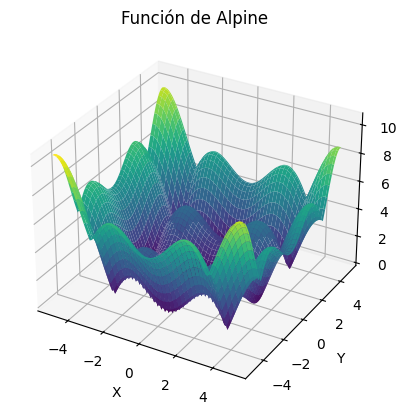

In [ ]:
# Crear una malla de puntos para graficar la función
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie de la función
ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título
plt.title('Función de Alpine')

# Mostrar la figura
plt.show()


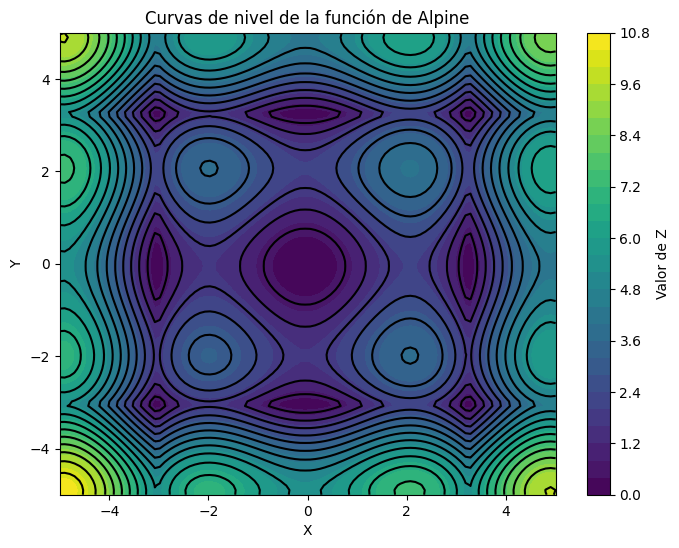

In [ ]:
# Crear una malla de puntos para graficar las curvas de nivel
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))  # Ajusta el tamaño aquí (ancho, alto)

# Graficar las curvas de nivel con un degradado continuo
contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis')  # levels ajusta la cantidad de curvas de nivel

# Graficar las curvas de nivel con líneas negras para resaltarlas
plt.contour(X, Y, Z, levels=20, colors='black')  # levels ajusta la cantidad de curvas de nivel

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título
plt.title('Curvas de nivel de la función de Alpine')

# Agregar la barra de color para el valor Z
plt.colorbar(contour, label='Valor de Z')

# Mostrar la gráfica
plt.show()


# Hill climbing
Veamos el comportamiento de hill climbing con la función alpine.

In [ ]:
def hill_climbing(x_inicial, y_inicial, tam_paso, num_vec, num_iteraciones):
    x_actual = x_inicial
    y_actual = y_inicial
    valor_actual = alpine(x_actual, y_actual)

    # Guardar las coordenadas iniciales
    coordenadas_x = [x_actual]
    coordenadas_y = [y_actual]
    valores = [valor_actual]

    for i in range(num_iteraciones):
        # Generar vecinos
        vecinos = []
        for dx in range(num_vec):
            dx = random.uniform(-tam_paso, tam_paso)
            dy = random.uniform(-tam_paso, tam_paso)
            x = x_actual + dx
            y = y_actual + dy

            # Revisamos que los valores estén en [-5, 5]
            if x < -5.0:
              x = -5 - (x + 5)
            if x > 5.0:
              x = 5 - (x - 5)
            if y < -5.0:
              y = -5 - (y + 5)
            if y > 5.0:
              y = 5 - (y - 5)
            vecinos.append((x, y))

        # Evaluar vecinos y encontrar el mejor vecino
        mejor_valor_vecino = float('inf')
        mejor_vecino = None
        for vecino_x, vecino_y in vecinos:
            valor_vecino = alpine(vecino_x, vecino_y)
            if valor_vecino < mejor_valor_vecino:
                mejor_valor_vecino = valor_vecino
                mejor_vecino = (vecino_x, vecino_y)

        # Actualizar la posición actual
        if mejor_valor_vecino < valor_actual:
            x_actual, y_actual = mejor_vecino
            valor_actual = mejor_valor_vecino
            coordenadas_x.append(x_actual)
            coordenadas_y.append(y_actual)
            valores.append(valor_actual)
            contador = 0
        else:
            contador += 1
            if contador >= 100:
                break

    return coordenadas_x, coordenadas_y, valores

In [ ]:
# Parámetros del algoritmo
x_inicial = np.random.uniform(-5.0, 5.0)
y_inicial = np.random.uniform(-5.0, 5.0)
tamano_paso = 0.1
numero_vecinos = 1000
numero_iteraciones = 1000

# Ejecutar el algoritmo de escalada de colinas
coordenadas_x, coordenadas_y, valores = hill_climbing(x_inicial, y_inicial,
                                                      tamano_paso, numero_vecinos, numero_iteraciones)

print("Mejor costo encontrado:")
print("X:", coordenadas_x[-1])
print("Y:", coordenadas_y[-1])
print("Valor de Alpine:", valores[-1])

Mejor costo encontrado:
X: -0.09998644680042551
Y: -0.10027800562908515
Valor de Alpine: 2.9037987986217997e-05


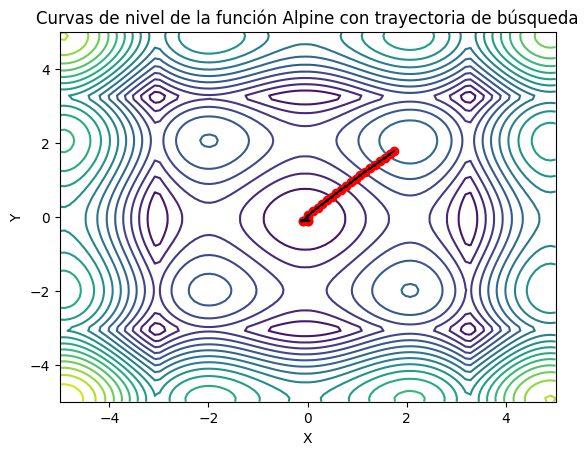

In [ ]:
#Buscamos coordenadas máxima y mínima, y agregamos un margen
max_x = 5.12
min_x = - 5.12
max_y = 5.12
min_y = - 5.12

# Ajustar los valores de min_x y max_x dentro del intervalo [-5, 5]
if min_x < -5:
    min_x = -5
if max_x > 5:
    max_x = 5

# Ajustar los valores de min_y y max_y dentro del intervalo [-5, 5]
if min_y < -5:
    min_y = -5
if max_y > 5:
    max_y = 5

# Crear una malla de puntos para graficar las curvas de nivel
x = np.linspace(min_x, max_x, 100)
y = np.linspace(min_y, max_y, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Graficar las curvas de nivel
plt.contour(X, Y, Z, levels=20)

# Graficar las trayectorias seguidas por el algoritmo
plt.plot(coordenadas_x, coordenadas_y, color='red', marker='o', linestyle='-')

# Agregar flechas para indicar la dirección del movimiento
for i in range(1, len(coordenadas_x)):
    plt.arrow(coordenadas_x[i-1], coordenadas_y[i-1], coordenadas_x[i] - coordenadas_x[i-1], coordenadas_y[i] - coordenadas_y[i-1],
              color='black', head_width=0.05, head_length=0.05, zorder=10)

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título
plt.title('Curvas de nivel de la función Alpine con trayectoria de búsqueda')

# Mostrar la gráfica
plt.show()

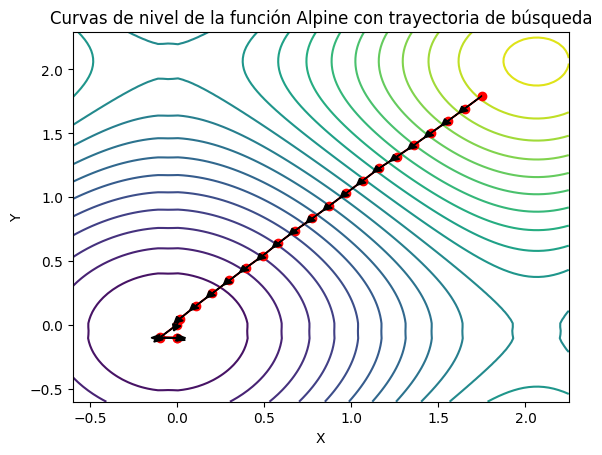

In [ ]:
#Buscamos coordenadas máxima y mínima, y agregamos un margen
max_x = max(coordenadas_x) + 0.5
min_x = min(coordenadas_x) - 0.5
max_y = max(coordenadas_y) + 0.5
min_y = min(coordenadas_y) - 0.5

# Ajustar los valores de min_x y max_x dentro del intervalo [-5, 5]
if min_x < -5:
    min_x = -5
if max_x > 5:
    max_x = 5

# Ajustar los valores de min_y y max_y dentro del intervalo [-5, 5]
if min_y < -5:
    min_y = -5
if max_y > 5:
    max_y = 5

# Crear una malla de puntos para graficar las curvas de nivel
x = np.linspace(min_x, max_x, 100)
y = np.linspace(min_y, max_y, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Graficar las curvas de nivel
plt.contour(X, Y, Z, levels=20)

# Graficar las trayectorias seguidas por el algoritmo
plt.plot(coordenadas_x, coordenadas_y, color='red', marker='o', linestyle='-')

# Agregar flechas para indicar la dirección del movimiento
for i in range(1, len(coordenadas_x)):
    plt.arrow(coordenadas_x[i-1], coordenadas_y[i-1], coordenadas_x[i] - coordenadas_x[i-1], coordenadas_y[i] - coordenadas_y[i-1],
              color='black', head_width=0.05, head_length=0.05, zorder=10)

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título
plt.title('Curvas de nivel de la función Alpine con trayectoria de búsqueda')

# Mostrar la gráfica
plt.show()

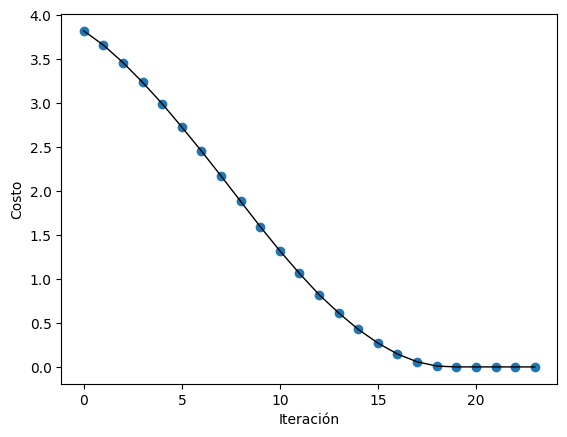

In [ ]:
# La posición en la lista como valores "x"
valores_x = list(range(len(valores)))

# Conectar los puntos consecutivos con una línea negra
plt.plot(valores_x, valores, color='black', linestyle='-', linewidth=1, label='Línea')

# Crear la gráfica de dispersión
plt.scatter(valores_x, valores)

# Agregar etiquetas a los ejes
plt.xlabel("Iteración")
plt.ylabel("Costo")

# Mostrar la gráfica
plt.show()

#Veamos una animación

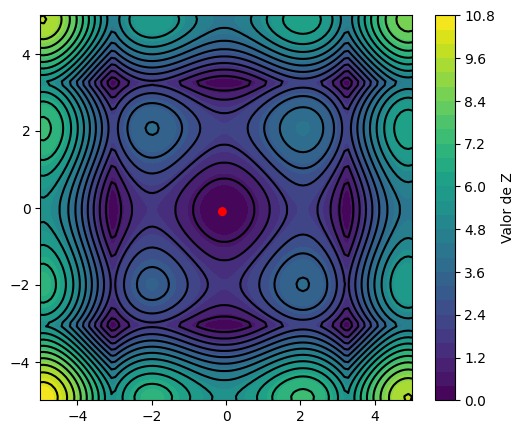

In [ ]:
# Crear la malla de puntos para las curvas de nivel
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 5))

# Graficar las curvas de nivel con un degradado continuo
contour = ax.contourf(X, Y, Z, levels=30, cmap='viridis')  # niveles ajusta la cantidad de curvas de nivel
ax.contour(X, Y, Z, levels=20, colors='black')  # curvas de nivel con líneas negras

# Agregar la barra de color
plt.colorbar(contour, ax=ax, label='Valor de Z')

# Inicializar el círculo
circle = plt.Circle((coordenadas_x[0], coordenadas_y[0]), 0.1, color='red', zorder=5)
ax.add_artist(circle)

# Función de actualización para la animación
def update(frame):
    # Actualizar la posición del círculo
    circle.set_center((coordenadas_x[frame], coordenadas_y[frame]))
    return circle,

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(coordenadas_x), interval=50, blit=True)

# Guardar la animación como archivo MP4
ani.save('animacion.mp4', writer='ffmpeg', fps=1)

# Mostrar el video dentro de Google Colab
Video('animacion.mp4', embed=True)
